1. Load the Dataset

In [2]:
import pandas as pd

# Load the dataset
data = pd.read_csv("/Users/roopkaur/Downloads/Boxify Dataset - Data Analyst Bootcamp.csv")
data.head()

,Order,File_Type,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
0,2,Historical,1737127,0.0,0.0,D,15,1,682743.0,44.99,2015,8,28.97,31.84
1,3,Historical,3255963,0.0,0.0,D,7,1,1016014.0,24.81,2005,39,0.00,15.54
2,4,Historical,612701,0.0,0.0,D,0,0,340464.0,46.00,2013,34,30.19,27.97
3,6,Historical,115883,1.0,1.0,D,4,1,334011.0,100.00,2006,20,133.93,83.15
4,7,Historical,863939,1.0,1.0,D,2,1,1287938.0,121.95,2010,28,4.00,23.99


2. Summary of the dataset

In [3]:
# Summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198917 entries, 0 to 198916
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order             198917 non-null  int64  
 1   File_Type         198917 non-null  object 
 2   SKU_number        198917 non-null  int64  
 3   SoldFlag          75996 non-null   float64
 4   SoldCount         75996 non-null   float64
 5   MarketingType     198917 non-null  object 
 6   ReleaseNumber     198917 non-null  int64  
 7   New_Release_Flag  198917 non-null  int64  
 8   StrengthFactor    198917 non-null  float64
 9   PriceReg          198917 non-null  float64
 10  ReleaseYear       198917 non-null  int64  
 11  ItemCount         198917 non-null  int64  
 12  LowUserPrice      198917 non-null  float64
 13  LowNetPrice       198917 non-null  float64
dtypes: float64(6), int64(6), object(2)
memory usage: 21.2+ MB


In [4]:
data.describe()

,Order,SKU_number,SoldFlag,SoldCount,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
count,198917.000000,1.989170e+05,75996.000000,75996.000000,198917.000000,198917.000000,1.989170e+05,198917.000000,198917.000000,198917.000000,198917.000000,198917.000000
mean,106483.543242,8.613626e+05,0.171009,0.322306,3.412202,0.642248,1.117115e+06,90.895243,2006.016414,41.426283,30.982487,46.832053
std,60136.716784,8.699794e+05,0.376519,1.168615,3.864243,0.479340,1.522090e+06,86.736367,9.158331,37.541215,69.066155,128.513236
min,2.000000,5.000100e+04,0.000000,0.000000,0.000000,0.000000,6.275000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55665.000000,2.172520e+05,0.000000,0.000000,1.000000,0.000000,1.614188e+05,42.000000,2003.000000,21.000000,4.910000,17.950000
50%,108569.000000,6.122080e+05,0.000000,0.000000,2.000000,1.000000,5.822240e+05,69.950000,2007.000000,32.000000,16.080000,33.980000
75%,158298.000000,9.047510e+05,0.000000,0.000000,5.000000,1.000000,1.430083e+06,116.000000,2011.000000,50.000000,40.240000,55.490000
max,208027.000000,3.960788e+06,1.000000,73.000000,99.000000,1.000000,1.738445e+07,12671.480000,2018.000000,2542.000000,14140.210000,19138.790000


In [5]:
data.columns

Index(['Order', 'File_Type', 'SKU_number', 'SoldFlag', 'SoldCount',
       'MarketingType', 'ReleaseNumber', 'New_Release_Flag', 'StrengthFactor',
       'PriceReg', 'ReleaseYear', 'ItemCount', 'LowUserPrice', 'LowNetPrice'],
      dtype='object')

3. Data Cleaning and Preparation

In [6]:
# Handling missing values
# For SoldFlag and SoldCount, let's replace missing values with 0 (indicating no sale)
data['SoldFlag'].fillna(0, inplace=True)
data['SoldCount'].fillna(0, inplace=True)

# Verifying the changes
missing_values_summary = data.isnull().sum()

# Checking for any inconsistencies or outliers in numerical columns
numerical_columns = ['Order', 'SKU_number', 'SoldFlag', 'SoldCount', 'ReleaseNumber', 
                     'New_Release_Flag', 'StrengthFactor', 'PriceReg', 'ReleaseYear', 
                     'ItemCount', 'LowUserPrice', 'LowNetPrice']
numerical_summary = data[numerical_columns].describe()

missing_values_summary, numerical_summary

(Order               0
 File_Type           0
 SKU_number          0
 SoldFlag            0
 SoldCount           0
 MarketingType       0
 ReleaseNumber       0
 New_Release_Flag    0
 StrengthFactor      0
 PriceReg            0
 ReleaseYear         0
 ItemCount           0
 LowUserPrice        0
 LowNetPrice         0
 dtype: int64,
                Order    SKU_number       SoldFlag      SoldCount  \
 count  198917.000000  1.989170e+05  198917.000000  198917.000000   
 mean   106483.543242  8.613626e+05       0.065334       0.123137   
 std     60136.716784  8.699794e+05       0.247115       0.739101   
 min         2.000000  5.000100e+04       0.000000       0.000000   
 25%     55665.000000  2.172520e+05       0.000000       0.000000   
 50%    108569.000000  6.122080e+05       0.000000       0.000000   
 75%    158298.000000  9.047510e+05       0.000000       0.000000   
 max    208027.000000  3.960788e+06       1.000000      73.000000   
 
        ReleaseNumber  New_Release_Flag 

In [7]:
data.dtypes

Order                 int64
File_Type            object
SKU_number            int64
SoldFlag            float64
SoldCount           float64
MarketingType        object
ReleaseNumber         int64
New_Release_Flag      int64
StrengthFactor      float64
PriceReg            float64
ReleaseYear           int64
ItemCount             int64
LowUserPrice        float64
LowNetPrice         float64
dtype: object

In [8]:
# Convert ReleaseYear to datetime format for better analysis
data['ReleaseYear'] = pd.to_datetime(data['ReleaseYear'], format='%Y', errors='coerce')

In [9]:
# Converting some data types as per required analysis
# Convert SoldFlag and SoldCount to integer
data['SoldFlag'] = data['SoldFlag'].astype(int)
data['SoldCount'] = data['SoldCount'].astype(int)

# Convert File_Type and MarketingType to category
data['File_Type'] = data['File_Type'].astype('category')
data['MarketingType'] = data['MarketingType'].astype('category')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198917 entries, 0 to 198916
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order             198917 non-null  int64         
 1   File_Type         198917 non-null  category      
 2   SKU_number        198917 non-null  int64         
 3   SoldFlag          198917 non-null  int64         
 4   SoldCount         198917 non-null  int64         
 5   MarketingType     198917 non-null  category      
 6   ReleaseNumber     198917 non-null  int64         
 7   New_Release_Flag  198917 non-null  int64         
 8   StrengthFactor    198917 non-null  float64       
 9   PriceReg          198917 non-null  float64       
 10  ReleaseYear       198916 non-null  datetime64[ns]
 11  ItemCount         198917 non-null  int64         
 12  LowUserPrice      198917 non-null  float64       
 13  LowNetPrice       198917 non-null  float64       
dtypes: c

4. Exploratory Data Analysis

A. Total Sales Over Time

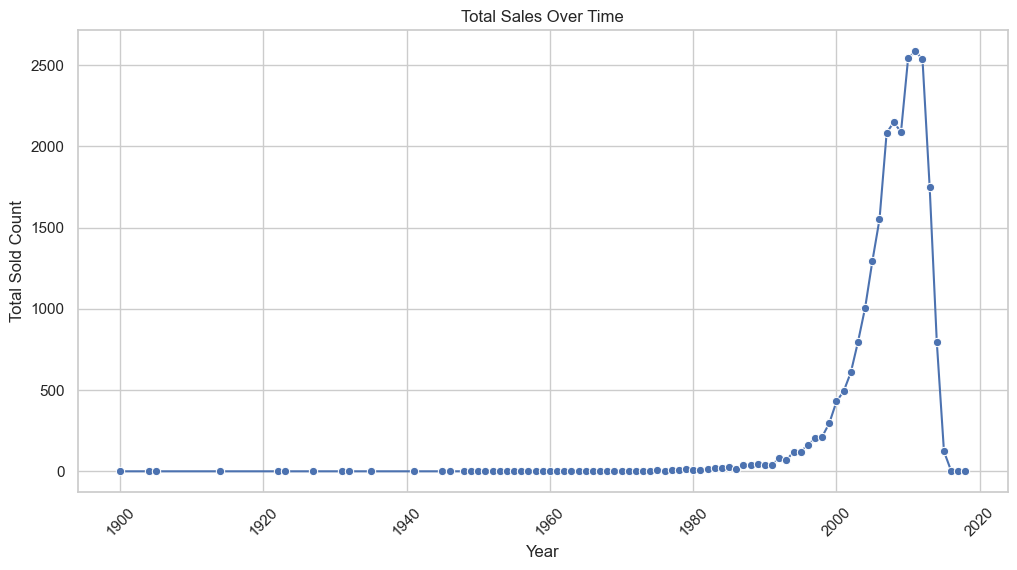

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Total sales over time
sales_over_time = data.groupby('ReleaseYear')['SoldCount'].sum().reset_index()

# Plot total sales over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_over_time, x='ReleaseYear', y='SoldCount', marker='o')
plt.title('Total Sales Over Time')
plt.xlabel('Year')
plt.ylabel('Total Sold Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

B. Sales Distribution by Year

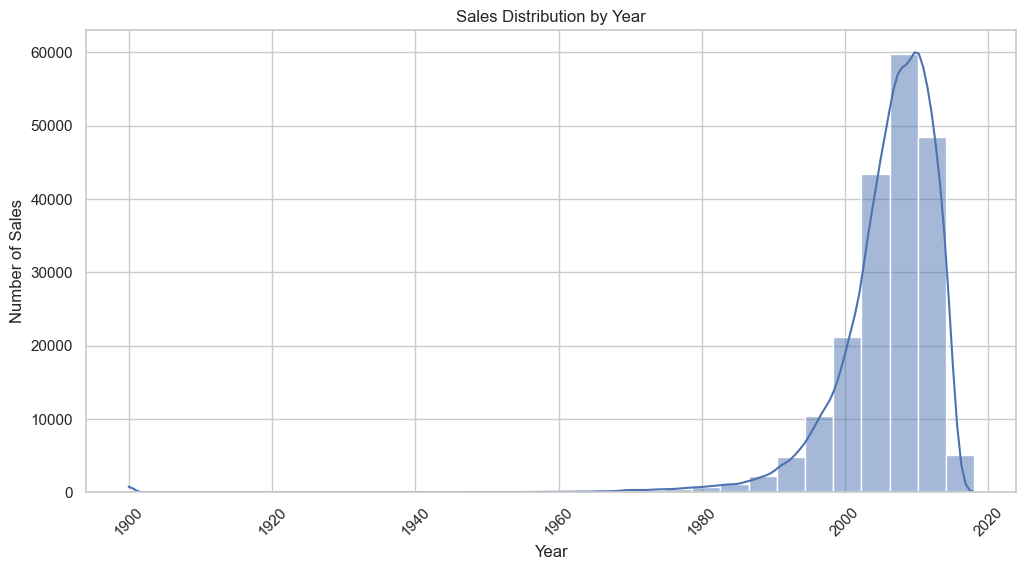

In [13]:
# Sales distribution by year
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='ReleaseYear', bins=30, kde=True)
plt.title('Sales Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

C. Identify Top-Selling Products

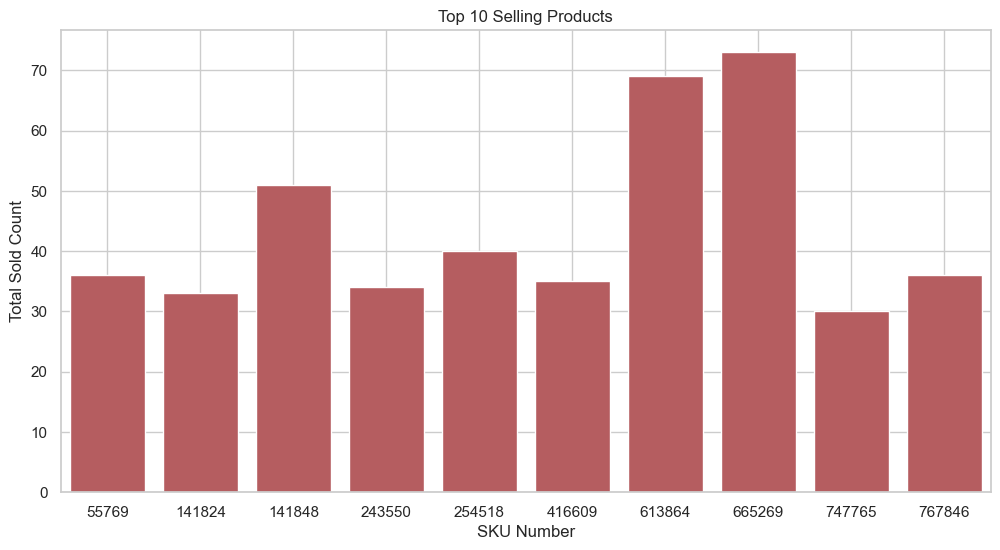

In [15]:
# Top-selling products
top_products = data.groupby('SKU_number')['SoldCount'].sum().reset_index().sort_values(by='SoldCount', ascending=False)

# Plot top-selling products
plt.figure(figsize=(12, 6))
sns.barplot(data=top_products.head(10), x='SKU_number', y='SoldCount',color='r')
plt.title('Top 10 Selling Products')
plt.xlabel('SKU Number')
plt.ylabel('Total Sold Count')
plt.grid(True)
plt.show()

D. Top-selling categories

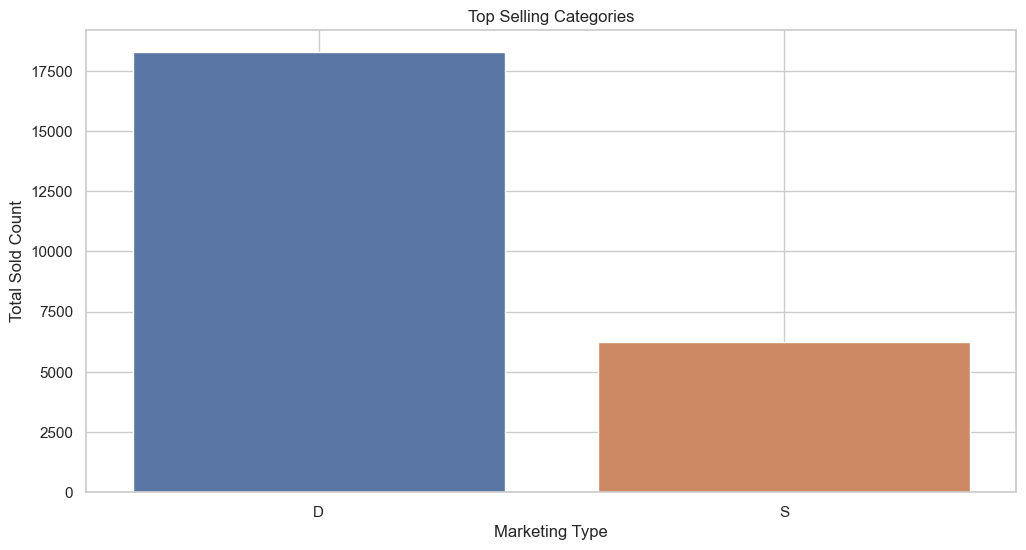

In [16]:
top_categories = data.groupby('MarketingType')['SoldCount'].sum().reset_index().sort_values(by='SoldCount', ascending=True)

# Plot top-selling categories
plt.figure(figsize=(12, 6))
sns.barplot(data=top_categories, x='MarketingType', y='SoldCount')
plt.title('Top Selling Categories')
plt.xlabel('Marketing Type')
plt.ylabel('Total Sold Count')
plt.grid(True)
plt.show()

E. Investigate Stock Levels and Low-Stock Items


In [17]:
# Assuming ItemCount represents stock levels
low_stock_items = data[data['ItemCount'] < 10]  # Threshold for low stock can be adjusted

low_stock_summary = low_stock_items[['SKU_number', 'ItemCount']].sort_values(by='ItemCount')

low_stock_summary.head(10)

,SKU_number,ItemCount
41643,3763514,0
103059,2295426,0
42240,3775878,0
123224,2285510,0
123351,2277511,0
42095,3212060,0
42084,1438250,0
42004,3793730,0
41958,2627348,0
123595,2277021,0


F. Distribution of Sold Count On Year basis

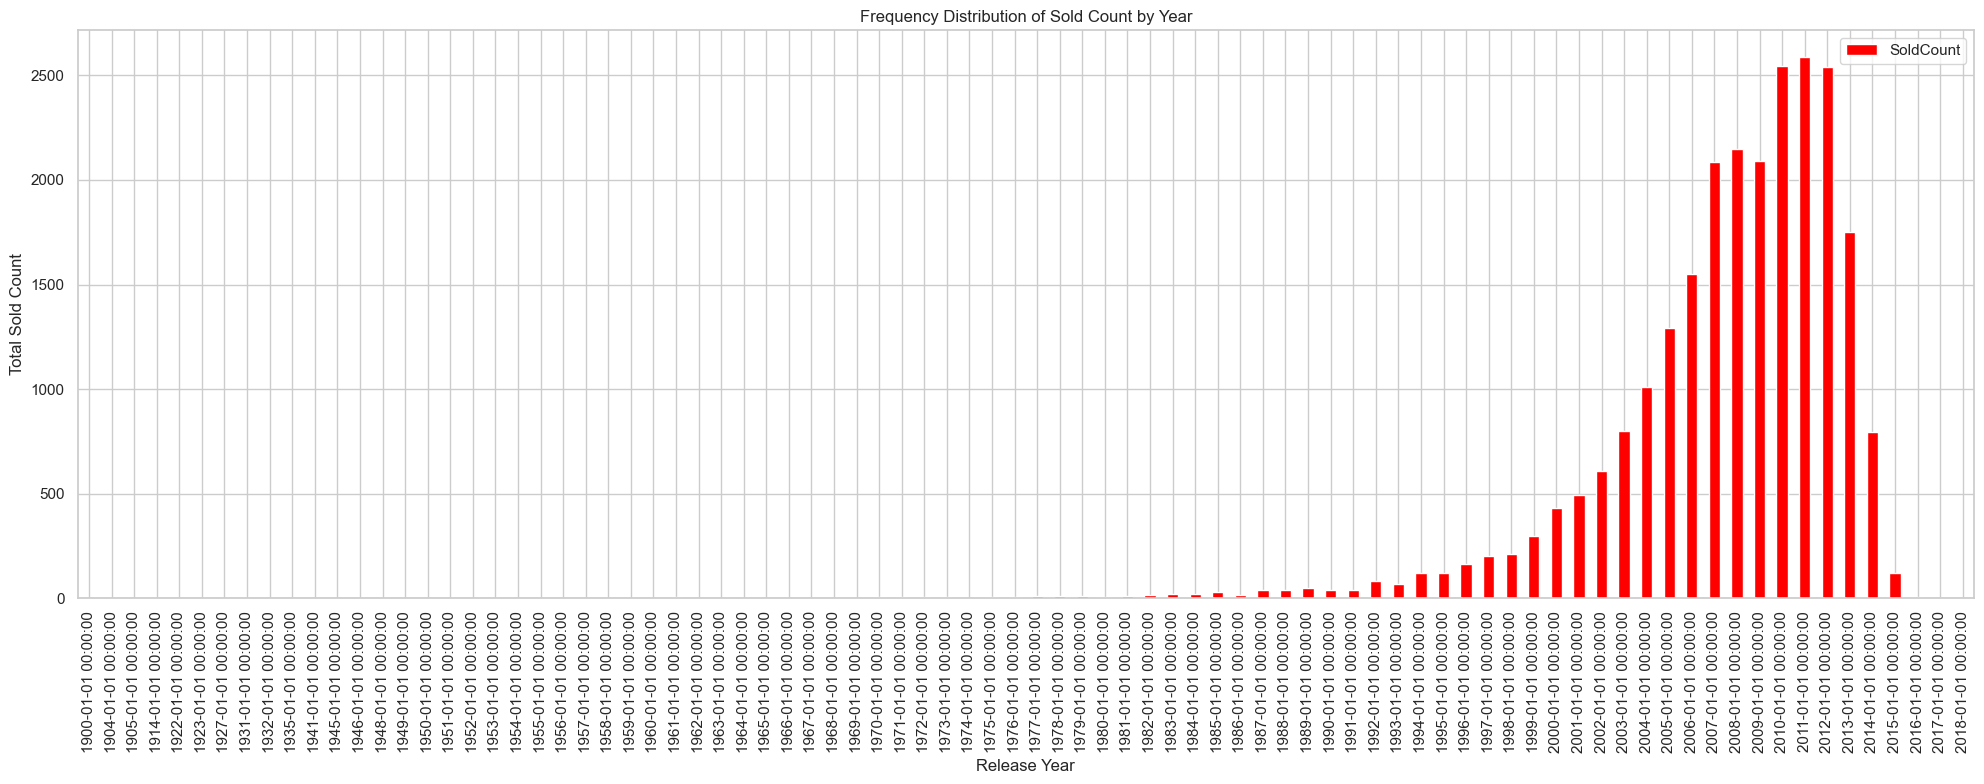

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a pivot table to aggregate 'SoldCount' by 'ReleaseYear'
pivot_table = pd.pivot_table(data, values='SoldCount', index='ReleaseYear', aggfunc='sum')

fig, ax = plt.subplots(figsize=(20, 8))
pivot_table.plot(kind='bar', ax=ax, color='red')

ax.set_title("Frequency Distribution of Sold Count by Year")
ax.set_xlabel("Release Year")
ax.set_ylabel("Total Sold Count")

plt.xticks(rotation=90) 
plt.tight_layout()       
plt.show()

In [19]:
# Define low stock threshold
low_stock_summary = 10

# Identify low-stock items
low_stock_items = data[data['ItemCount'] < low_stock_summary]

# Current stock levels
current_stock_levels = data.groupby('SKU_number')['ItemCount'].sum().reset_index()

# Calculate low-stock items percentage
low_stock_items_count = low_stock_items.shape[0]
total_items_count = data.shape[0]
low_stock_percentage = (low_stock_items_count / total_items_count) * 100

print(f"Low-stock items count: {low_stock_items_count}")
print(f"Percentage of low-stock items: {low_stock_percentage:.2f}%")

Low-stock items count: 3379
Percentage of low-stock items: 1.70%


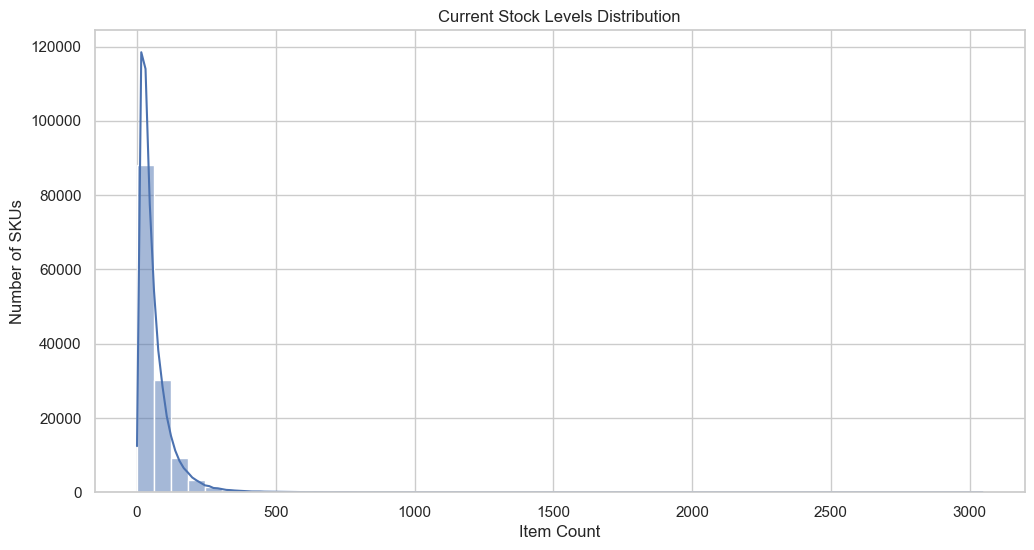

In [20]:
# Plot current stock levels
plt.figure(figsize=(12, 6))
sns.histplot(data=current_stock_levels, x='ItemCount', bins=50, kde=True)
plt.title('Current Stock Levels Distribution')
plt.xlabel('Item Count')
plt.ylabel('Number of SKUs')
plt.grid(True)
plt.show()

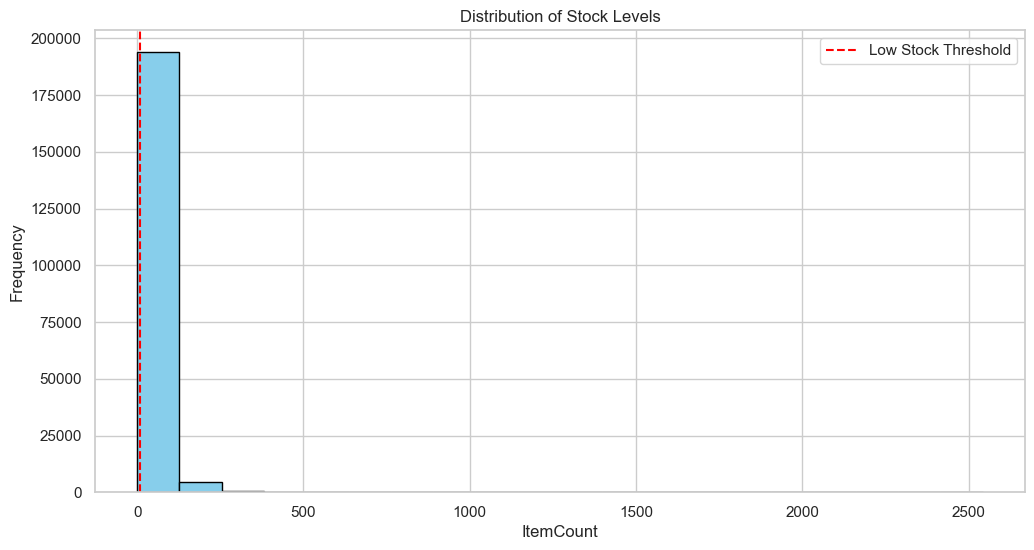

In [21]:
# Visualization of stock levels
plt.figure(figsize=(12, 6))
plt.hist(data['ItemCount'], bins=20, color='skyblue', edgecolor='black')
plt.axvline(x=low_stock_summary, color='red', linestyle='--', label='Low Stock Threshold')
plt.title('Distribution of Stock Levels')
plt.xlabel('ItemCount')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

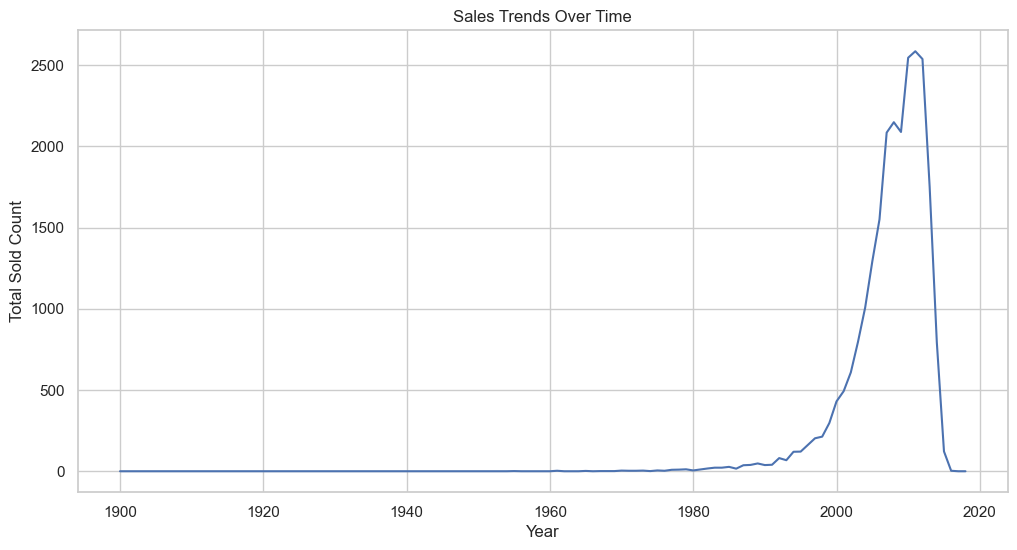

In [22]:
# Sales trends over time (number of sales per year)
sales_per_year = data.groupby(data['ReleaseYear'].dt.year)['SoldCount'].sum()

# Plotting sales trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=sales_per_year.index, y=sales_per_year.values)
plt.title('Sales Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Total Sold Count')
plt.grid(True)
plt.show()

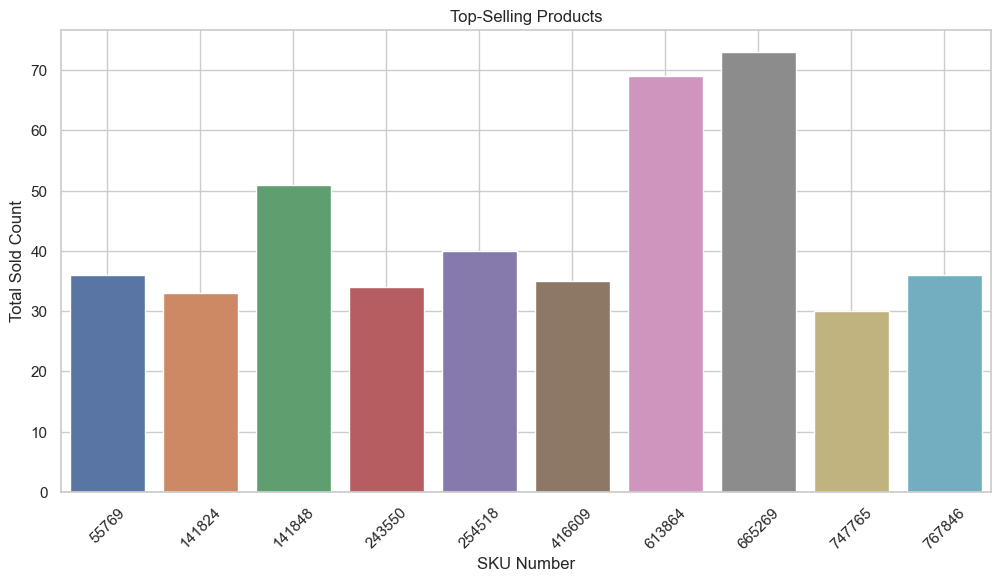

In [23]:
# Identify top-selling products by SKU_number
top_selling_products = data.groupby('SKU_number')['SoldCount'].sum().sort_values(ascending=False).head(10)

# Plotting top-selling products
plt.figure(figsize=(12, 6))
sns.barplot(x=top_selling_products.index, y=top_selling_products.values)
plt.title('Top-Selling Products')
plt.xlabel('SKU Number')
plt.ylabel('Total Sold Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

4. Inventory Insights

A. Calculate Inventory Turnover

In [24]:
# Calculate total sold count and average inventory level
total_sold_count = data['SoldCount'].sum()
average_inventory_level = data['ItemCount'].mean()

# Calculate inventory turnover
inventory_turnover = total_sold_count / average_inventory_level

print(f"Inventory Turnover: {inventory_turnover:.2f}")

Inventory Turnover: 591.27


B. Calculate Stock-to-Sales Ratio

In [26]:
# Calculate total inventory and total sales
total_inventory = data['ItemCount'].sum()
total_sales = data['SoldCount'].sum()

# Calculate stock-to-sales ratio
stock_to_sales_ratio = total_inventory / total_sales

print(f"Stock-to-Sales Ratio: {stock_to_sales_ratio:.2f}")

Stock-to-Sales Ratio: 336.42


C. Calculate Reorder Points

In [28]:
# Assume a lead time of 14 days
lead_time_days = 14

# Calculate daily demand (assuming the dataset spans 365 days)
daily_demand = total_sales / 365

# Calculate Lead Time Demand
lead_time_demand = daily_demand * lead_time_days

# Estimate Safety Stock (e.g., 20% of lead time demand)
safety_stock = lead_time_demand * 0.20

# Calculate Reorder Point
reorder_point = lead_time_demand + safety_stock

print(f"Reorder Point: {reorder_point:.2f}")

Reorder Point: 1127.40


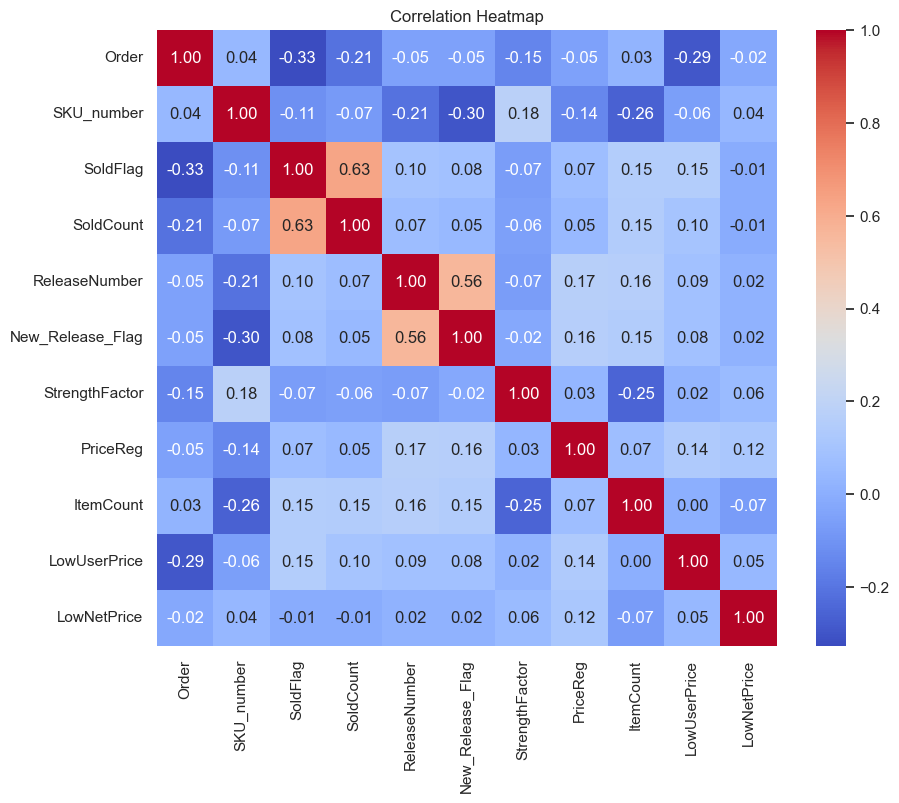

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns from the DataFrame
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))

# Plot the heatmap of the correlation matrix
sns.heatmap(corr_matrix,
            annot=True,          # Display the correlation coefficients on the heatmap
            fmt='.2f',          # Format for displaying the correlation coefficients
            cmap='coolwarm',    # Color map for the heatmap
            xticklabels=corr_matrix.columns,
            yticklabels=corr_matrix.columns)

plt.title('Correlation Heatmap')
plt.show()

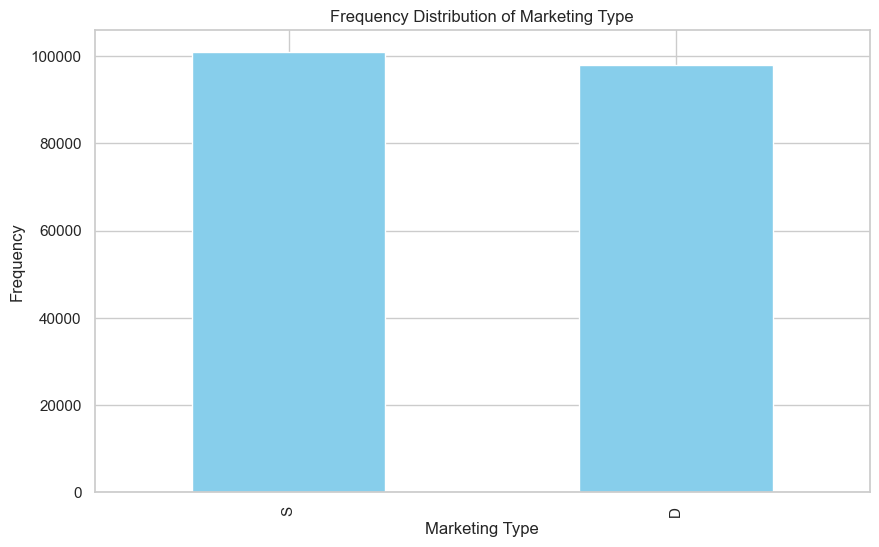

In [30]:
import matplotlib.pyplot as plt

# Count the frequency of each marketing type
marketing_type_counts = data['MarketingType'].value_counts()

plt.figure(figsize=(10, 6))
marketing_type_counts.plot(kind='bar', color='skyblue')

plt.title("Frequency Distribution of Marketing Type")
plt.xlabel("Marketing Type")
plt.ylabel("Frequency")
plt.show()

5. Recommendation regarding Inventory

In [31]:
# Aggregate sales data per product per month
data['OrderDate'] = pd.to_datetime(data['Order'])
data['YearMonth'] = data['OrderDate'].dt.to_period('M')
monthly_sales = data.groupby(['SKU_number', 'YearMonth'])['SoldCount'].sum().reset_index()
monthly_sales

,SKU_number,YearMonth,SoldCount
0,50001,1970-01,0
1,50002,1970-01,0
2,50003,1970-01,0
3,50004,1970-01,0
4,50005,1970-01,0
...,...,...,...
133355,3960560,1970-01,0
133356,3960724,1970-01,0
133357,3960742,1970-01,0
133358,3960760,1970-01,0


In [32]:
# Calculate Sales Value
data['SalesValue'] = data['SoldCount'] * data['PriceReg']

# Aggregate Sales Value per SKU
sku_sales = data.groupby('SKU_number')['SalesValue'].sum().reset_index()

# Rank SKUs by Sales Value
sku_sales['Rank'] = sku_sales['SalesValue'].rank(ascending=False)

# Determine ABC categories (top 20% as A, next 30% as B, rest as C)
total_skus = len(sku_sales)
sku_sales['Category'] = pd.cut(sku_sales['Rank'], bins=[0, 0.2*total_skus, 0.5*total_skus, total_skus], labels=['A', 'B', 'C'])

print(sku_sales.head(10))

   SKU_number  SalesValue     Rank Category
0       50001        0.00  73062.0        C
1       50002        0.00  73062.0        C
2       50003        0.00  73062.0        C
3       50004        0.00  73062.0        C
4       50005        0.00  73062.0        C
5       50006      194.95   4156.0        A
6       50009        0.00  73062.0        C
7       50011        0.00  73062.0        C
8       50012        0.00  73062.0        C
9       50013        0.00  73062.0        C


Low Stock Items

In [33]:
# Example of tracking inventory levels
inventory_levels = data.groupby('SKU_number')['ItemCount'].sum().reset_index()

# Set threshold for low stock
low_stock_threshold = 10
inventory_levels['LowStock'] = inventory_levels['ItemCount'] < low_stock_threshold

# Output low stock items for restocking
low_stock_items = inventory_levels[inventory_levels['LowStock']]
low_stock_items.head(10)

,SKU_number,ItemCount,LowStock
2780,53310,9,True
8050,105240,9,True
8075,105414,7,True
8573,107240,7,True
8634,107511,8,True
8733,108014,9,True
12609,118970,9,True
16430,138220,8,True
17863,145863,7,True
17880,145912,9,True


Calculate Key Performance Indicators (KPIs)

In [34]:
# Calculate Inventory Turnover (SoldCount / ItemCount)
# Adding a small value to ItemCount to avoid division by zero
data['InventoryTurnover'] = data['SoldCount'] / (data['ItemCount'] + 1e-5)

# Calculate Stock-to-Sales Ratio (ItemCount / SoldCount)
# Adding a small value to SoldCount to avoid division by zero
data['StockToSalesRatio'] = data['ItemCount'] / (data['SoldCount'] + 1e-5)

# Calculate Reorder Points
# Simple approach: If ItemCount is below a certain threshold, it's a reorder point
reorder_threshold = 10
data['ReorderPoint'] = data['ItemCount'] < reorder_threshold

# Summary of KPIs
inventory_kpis = data[['SKU_number', 'InventoryTurnover', 'StockToSalesRatio', 'ReorderPoint']].describe()

inventory_kpis

,SKU_number,InventoryTurnover,StockToSalesRatio
count,1.989170e+05,198917.000000,1.989170e+05
mean,8.613626e+05,1.008128,3.728885e+06
std,8.699794e+05,448.429360,3.603524e+06
min,5.000100e+04,0.000000,0.000000e+00
25%,2.172520e+05,0.000000,1.900000e+06
50%,6.122080e+05,0.000000,2.900000e+06
75%,9.047510e+05,0.000000,4.600000e+06
max,3.960788e+06,200000.000000,2.542000e+08


Recommendations based on inventory turnover and stock-to-sales ratio

In [35]:
# High inventory turnover and low stock-to-sales ratio indicate efficient inventory management
recommendations = data[(data['InventoryTurnover'] > data['InventoryTurnover'].mean()) & 
                       (data['StockToSalesRatio'] < data['StockToSalesRatio'].mean())]

# Displaying top 10 recommendations
print(recommendations.head(10))

       Order   File_Type  SKU_number  SoldFlag  SoldCount MarketingType  \
4615    4836  Historical     2277016         1          2             D   
16465  16865  Historical      613864         1         69             D   
26488  27073  Historical     1475488         1         12             D   
46039  51916  Historical      809190         1         12             S   

       ReleaseNumber  New_Release_Flag  StrengthFactor  PriceReg ReleaseYear  \
4615               5                 1        276684.0      0.00  2014-01-01   
16465              0                 0          7237.0     80.75  2012-01-01   
26488              2                 1       1448498.0     72.74  2013-01-01   
46039              5                 1        724822.0     40.00  2012-01-01   

       ItemCount  LowUserPrice  LowNetPrice                     OrderDate  \
4615           0          0.00       119.48 1970-01-01 00:00:00.000004836   
16465         44          0.00         0.00 1970-01-01 00:00:00.00001

Actionable Recommendations for Optimizing Inventory Management

1. Increase the precision of demand forecasts by utilising past sales data. Use statistical methods to better accurately forecast future sales trends, such as time series analysis or sophisticated machine learning algorithms.

2. To better manage inventory levels and anticipate demand swings and seasonal variations, think about incorporating predictive analytics and modelling techniques.

3. Adjust inventory levels dynamically based on real-time sales data and updated demand forecasts to align inventory with actual market needs.

4. Examine sales data frequently to find out which inventory goods are out-of-date or slow-moving. Implement strategies to reduce stock for items with declining demand.

5. Reallocate inventory resources to high-demand products to ensure that fast-moving items are sufficiently stocked, thus enhancing turnover and reducing storage costs.

6. Cut Down on Extra Inventory by Using a Just-in-Time (JIT) approach to ordering and replenishing stock only as needed. This strategy lessens surplus inventory, lowers storage expenses, and enhances cash flow.

7. Inventory can be divided into categories according on demand characteristics, profitability, and sales velocity. Develop unique inventory control plans for every market sector.

8. Utilise various inventory management techniques according to the unique requirements of every sector to maximise stock levels and reduce holding expenses and to shorten lead times and optimise the supply chain, build strong relationships with suppliers.

9. Keep a close eye on important inventory indicators such as reorder points, stock-to-sales ratios, and inventory turnover rates. Examine these indicators on a regular basis to spot performance that deviates from expectations.

10. Plan targeted discounts and promotions using sales data. In order to reduce surplus inventory and free up storage space, run promotions on slow-moving items.

Businesses can achieve optimised inventory management, which improves operational efficiency, lowers costs, and increases customer satisfaction, by putting these suggestions into practice. To be competitive in a changing corporate environment, plans must be reviewed and modified on a regular basis in reaction to market trends and sales patterns.